In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx

In [15]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('Data Set_Mental Health.csv')

# Display basic info about the dataset
print(data.head())
print(data.info())
print(data.describe())

   Sr No                                          Questions  \
0      1            How can I manage my stress and anxiety?   
1      2  What are some coping strategies for dealing wi...   
2      3  How can I improve my self-esteem and self-conf...   
3      4  What techniques can I use to overcome insomnia...   
4      5  How do I handle relationship issues or conflicts?   

                                             Answers  
0  To alleviate stress, engage in deep breathing,...  
1  Although dealing with depression can be diffic...  
2  Practice self-care to maintain physical and em...  
3  Create a sleep-friendly atmosphere, limit scre...  
4  Dealing with relationship problems and disagre...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sr No      700 non-null    int64 
 1   Questions  700 non-null    object
 2   Answers    700 non-null   

In [16]:
# Clean and preprocess text data
stop_words = set(stopwords.words('english'))
data['cleaned_answers'] = data['Answers'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words]))

In [17]:
# Word frequency analysis
word_freq = pd.Series(' '.join(data['cleaned_answers']).split()).value_counts()
print(word_freq.head())

important    950
help         803
also         593
support      515
positive     351
dtype: int64


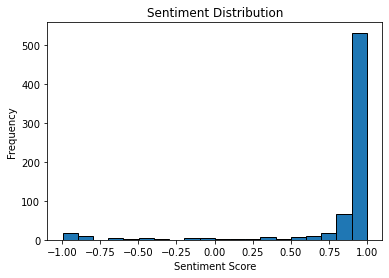

In [18]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['Answers'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Visualize sentiment distribution
plt.hist(data['sentiment_scores'], bins=20, edgecolor='k')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

In [19]:
# Topic modeling using LDA
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_answers'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}: {', '.join([feature_names[i] for i in topic.argsort()[-10:]])}")

Topic 0: manage, reduce, support, managing, therapy, techniques, important, symptoms, anxiety, help
Topic 1: goals, physical, way, practice, supportive, thoughts, body, help, negative, positive
Topic 2: family, online, stress, prioritize, support, time, help, healthy, boundaries, important
Topic 3: practice, clear, active, conflicts, help, listening, skills, assertiveness, important, communication
Topic 4: additionally, remember, experience, help, stress, important, emotional, support, feelings, emotions


In [20]:
# Create a word cloud
#    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)
#   plt.figure(figsize=(10, 5))
#    plt.imshow(wordcloud, interpolation='bilinear')
#    plt.axis('off')
#    plt.show()


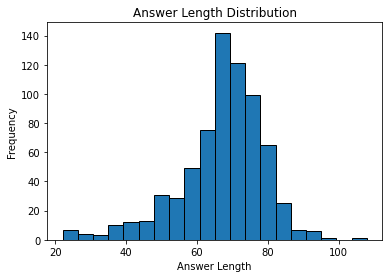

In [21]:
#Answer Length Distribution
data['answer_length'] = data['cleaned_answers'].apply(lambda x: len(word_tokenize(x)))
plt.hist(data['answer_length'], bins=20, edgecolor='k')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Answer Length Distribution')
plt.show()
